In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Data/cleaned_supply_chain_logistics_dataset.csv")

# --- Key Averages ---
avg_eta = df['eta_variation_hours'].mean()
avg_deviation = df['delivery_efficiency'].mean()

print(f"Average ETA Variation (hours): {avg_eta:.2f}")
print(f"Average Delivery Efficiency Score: {avg_deviation:.2f}")


Average ETA Variation (hours): 2.89
Average Delivery Efficiency Score: 27.38


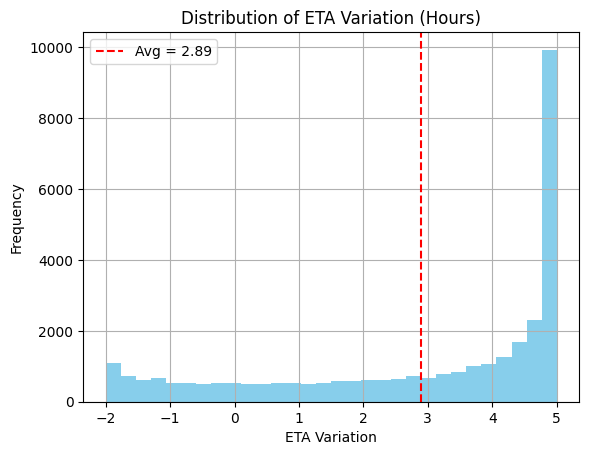

In [41]:
# --- Plot 1: ETA Variation Histogram ---
plt.figure()
plt.hist(df['eta_variation_hours'], bins=30, color='skyblue')
plt.title('Distribution of ETA Variation (Hours)')
plt.xlabel('ETA Variation')
plt.ylabel('Frequency')
plt.axvline(avg_eta, color='red', linestyle='--', label=f'Avg = {avg_eta:.2f}')
plt.legend()
plt.grid(True)
plt.show()

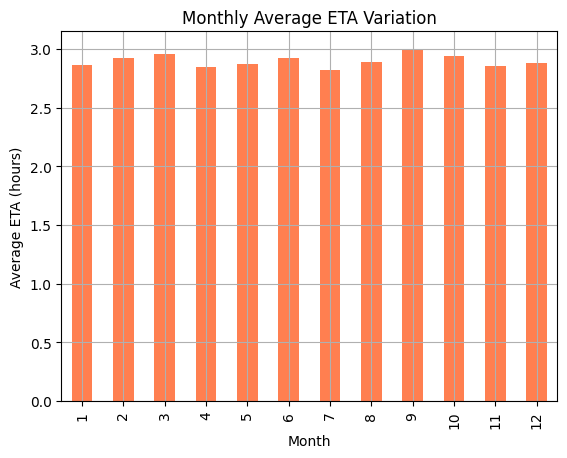

In [42]:
# --- Plot 2: Monthly ETA Variation ---
monthly_avg_delay = df.groupby('month')['eta_variation_hours'].mean()
plt.figure()
monthly_avg_delay.plot(kind='bar', color='coral')
plt.title("Monthly Average ETA Variation")
plt.xlabel("Month")
plt.ylabel("Average ETA (hours)")
plt.grid(True)
plt.show()

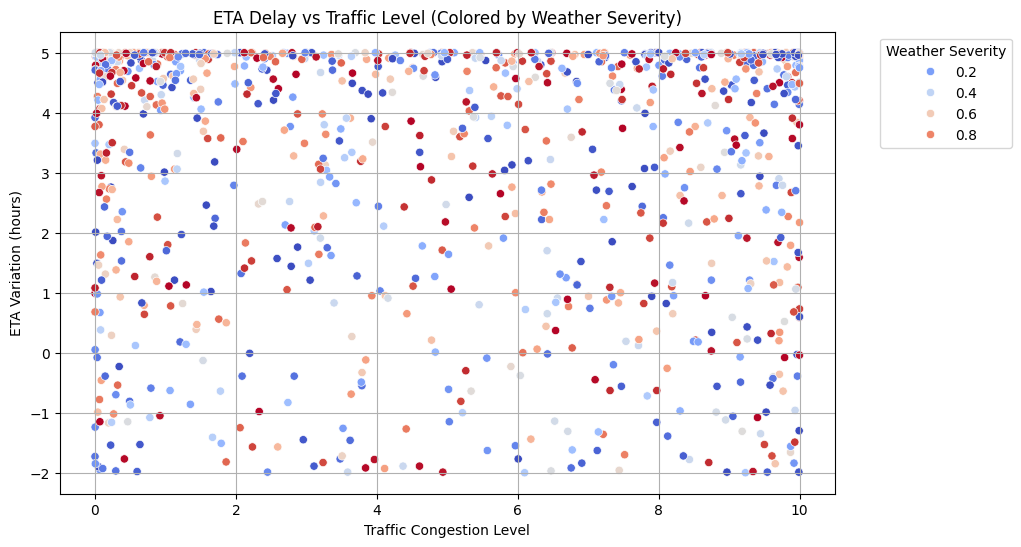

In [43]:
# --- Plot 3: Traffic vs ETA (Weather Severity Hue) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df, x='traffic_congestion_level', y='eta_variation_hours',
                hue='weather_condition_severity', palette='coolwarm')
plt.title("ETA Delay vs Traffic Level (Colored by Weather Severity)")
plt.xlabel("Traffic Congestion Level")
plt.ylabel("ETA Variation (hours)")
plt.legend(title='Weather Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

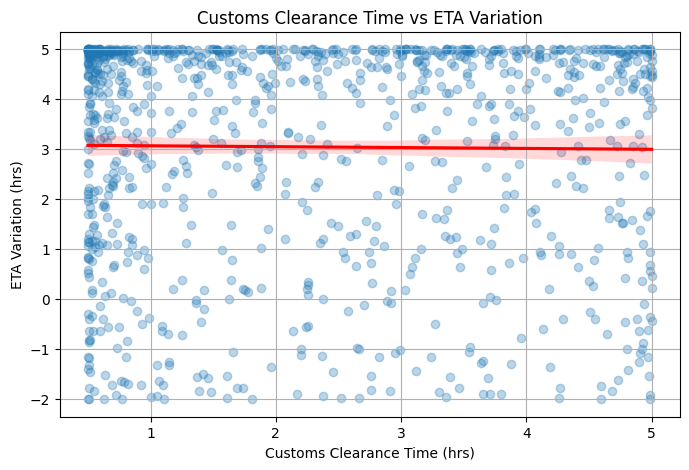

In [44]:
# --- Plot 4: Customs Time vs ETA ---
plt.figure(figsize=(8, 5))
sns.regplot(x='customs_clearance_time', y='eta_variation_hours', data=sampled_df,
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Customs Clearance Time vs ETA Variation")
plt.xlabel("Customs Clearance Time (hrs)")
plt.ylabel("ETA Variation (hrs)")
plt.grid(True)
plt.show()

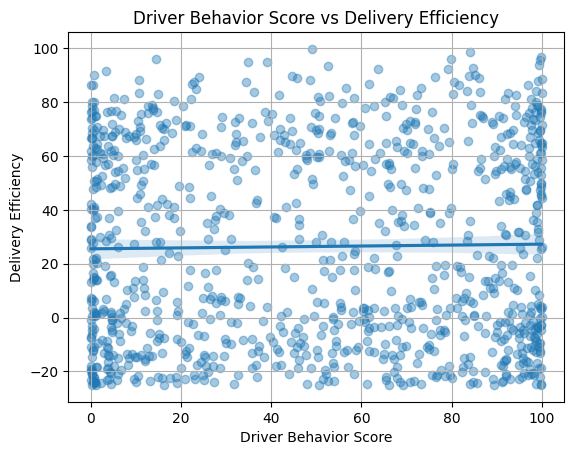

In [45]:
# --- Plot 5: Driver Score vs Efficiency ---
plt.figure()
sns.regplot(data=sampled_df, x='driver_behavior_score', y='delivery_efficiency', scatter_kws={'alpha':0.4})
plt.title("Driver Behavior Score vs Delivery Efficiency")
plt.xlabel("Driver Behavior Score")
plt.ylabel("Delivery Efficiency")
plt.grid(True)
plt.show()

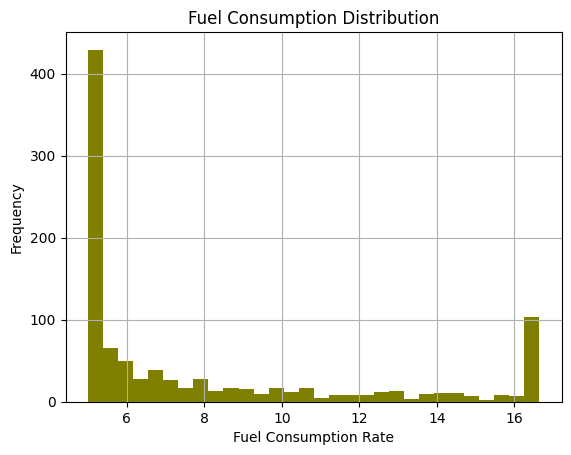

In [46]:
# --- Plot 6: Fuel Consumption ---
plt.figure()
sampled_df['fuel_consumption_rate'].plot(kind='hist', bins=30, color='olive')
plt.title("Fuel Consumption Distribution")
plt.xlabel("Fuel Consumption Rate")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

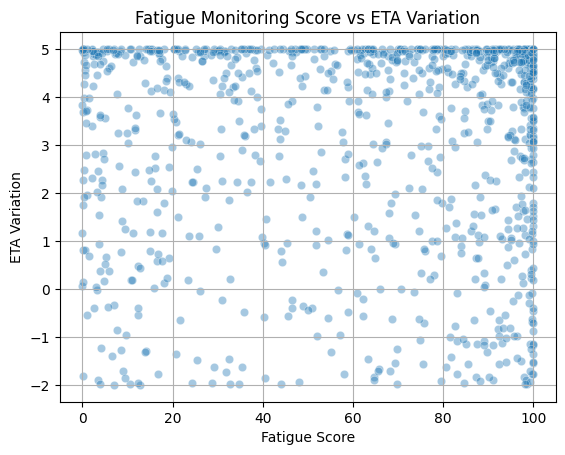

In [47]:
# --- Plot 7: Fatigue vs ETA ---
plt.figure()
sns.scatterplot(data=sampled_df, x='fatigue_monitoring_score', y='eta_variation_hours', alpha=0.4)
plt.title("Fatigue Monitoring Score vs ETA Variation")
plt.xlabel("Fatigue Score")
plt.ylabel("ETA Variation")
plt.grid(True)
plt.show()

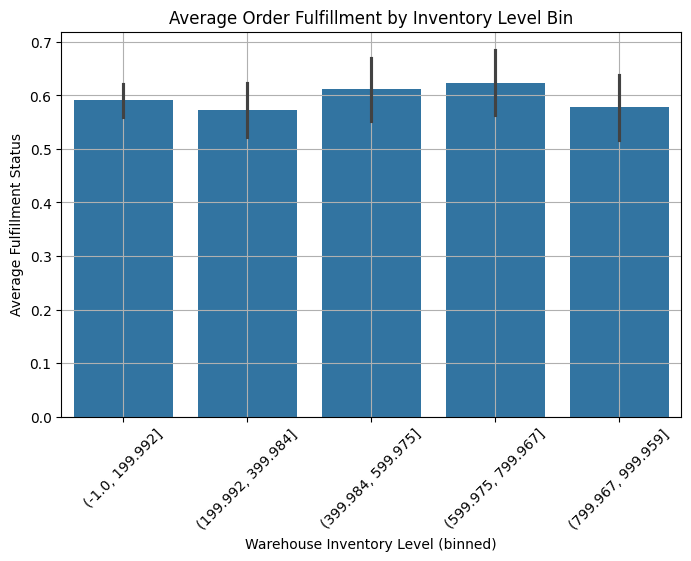

In [48]:
# --- Plot 8: Inventory Bin vs Fulfillment ---
sampled_df['inventory_bin'] = pd.cut(sampled_df['warehouse_inventory_level'], bins=5)
plt.figure(figsize=(8,5))
sns.barplot(x='inventory_bin', y='order_fulfillment_status', data=sampled_df, estimator='mean')
plt.title("Average Order Fulfillment by Inventory Level Bin")
plt.xlabel("Warehouse Inventory Level (binned)")
plt.ylabel("Average Fulfillment Status")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [49]:
# --- Optional: Diagnostics ---
print("Unique values in port_congestion_level:")
print(sampled_df['port_congestion_level'].value_counts(dropna=False))

print("\nMissing values in eta_variation_hours or port_congestion_level:")
print(sampled_df[['port_congestion_level', 'eta_variation_hours']].isnull().sum())

Unique values in port_congestion_level:
port_congestion_level
3.642852    1
6.217312    1
0.821405    1
9.999711    1
9.999986    1
           ..
9.996612    1
6.753414    1
9.846186    1
9.096320    1
9.914385    1
Name: count, Length: 1000, dtype: int64

Missing values in eta_variation_hours or port_congestion_level:
port_congestion_level    0
eta_variation_hours      0
dtype: int64


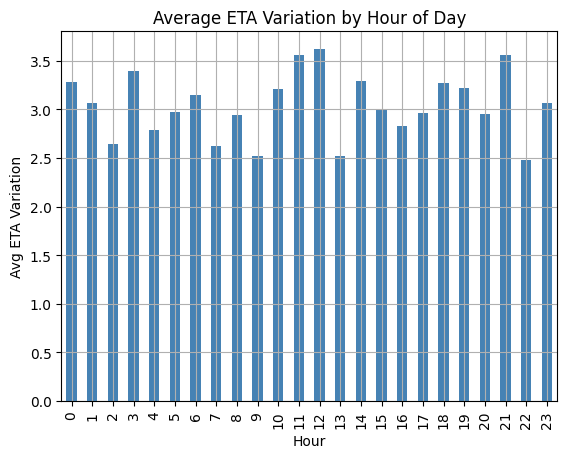

In [50]:
# --- Plot 9: ETA Variation by Hour ---
plt.figure()
sampled_df.groupby('hour')['eta_variation_hours'].mean().plot(kind='bar', color='steelblue')
plt.title("Average ETA Variation by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Avg ETA Variation")
plt.grid(True)
plt.show()

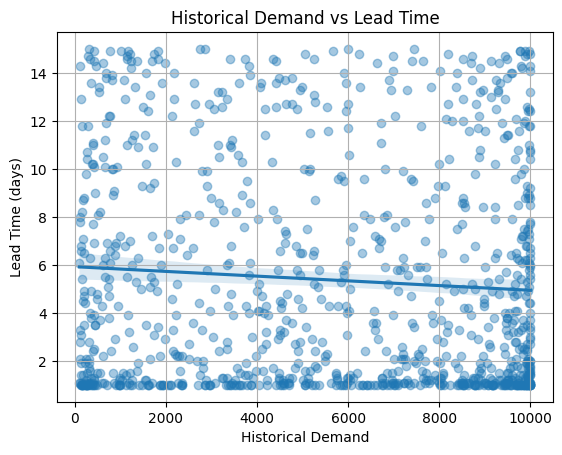

In [51]:
# --- Plot 10: Historical Demand vs Lead Time ---
plt.figure()
sns.regplot(data=sampled_df, x='historical_demand', y='lead_time_days', scatter_kws={'alpha':0.4})
plt.title("Historical Demand vs Lead Time")
plt.xlabel("Historical Demand")
plt.ylabel("Lead Time (days)")
plt.grid(True)
plt.show()

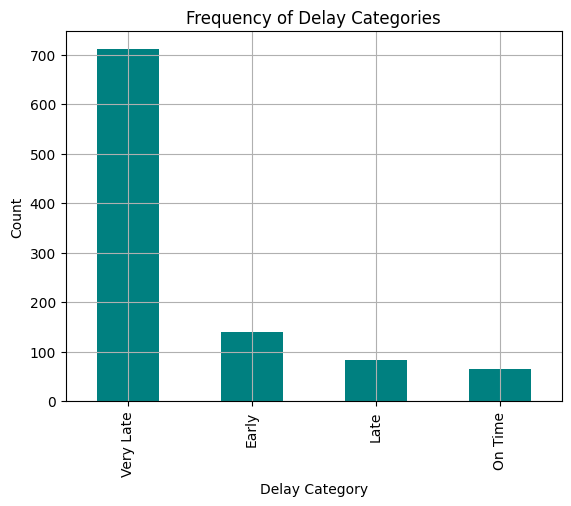

In [52]:
# --- Plot 11: Delay Category Count ---
plt.figure()
sampled_df['delay_category'].value_counts().plot(kind='bar', color='teal')
plt.title("Frequency of Delay Categories")
plt.xlabel("Delay Category")
plt.ylabel("Count")
plt.grid(True)
plt.show()

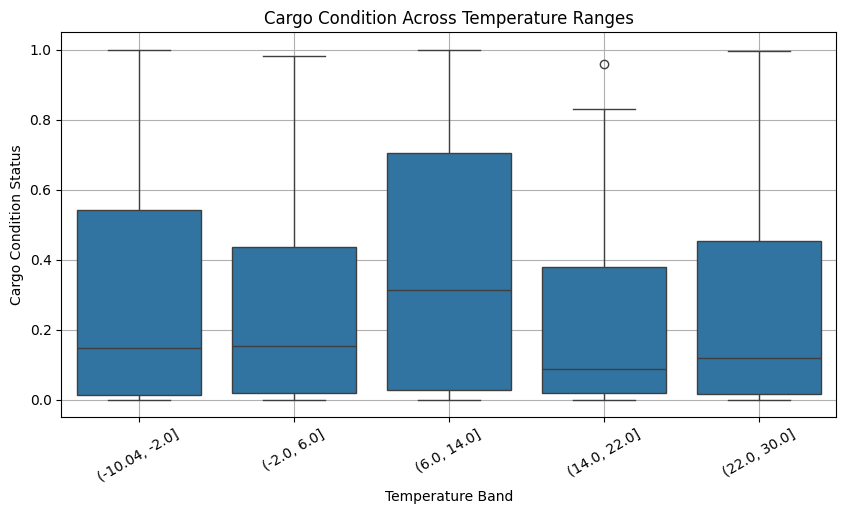

In [53]:
# --- Plot 12: Temp Bands vs Cargo Condition ---
sampled_df['temp_band'] = pd.cut(sampled_df['iot_temperature'], bins=5)
plt.figure(figsize=(10, 5))
sns.boxplot(data=sampled_df, x='temp_band', y='cargo_condition_status')
plt.title("Cargo Condition Across Temperature Ranges")
plt.xlabel("Temperature Band")
plt.ylabel("Cargo Condition Status")
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

C:\Users\ziadz\AppData\Local\Temp\ipykernel_2000\1264092134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sampled_df, x='day_of_week', y='delivery_efficiency', estimator='mean', palette='Blues')


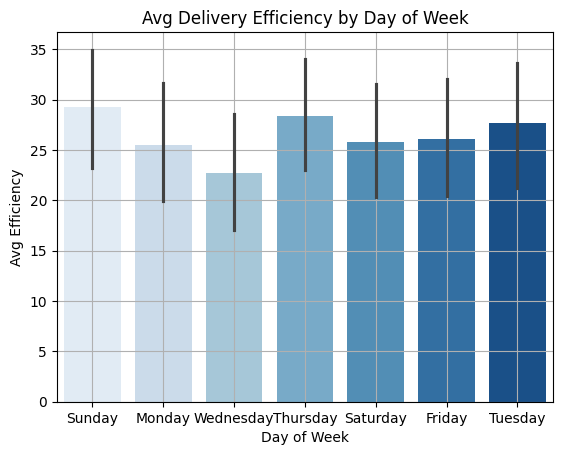

In [54]:
# --- Plot 13: Efficiency by Day of Week ---
plt.figure()
sns.barplot(data=sampled_df, x='day_of_week', y='delivery_efficiency', estimator='mean', palette='Blues')
plt.title("Avg Delivery Efficiency by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Avg Efficiency")
plt.grid(True)
plt.show()

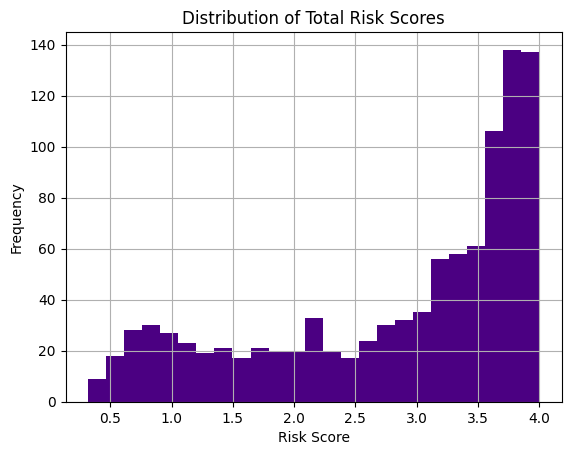

In [55]:
# --- Plot 14: Risk Score Distribution ---
plt.figure()
sampled_df['total_risk_score'].plot(kind='hist', bins=25, color='indigo')
plt.title("Distribution of Total Risk Scores")
plt.xlabel("Risk Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

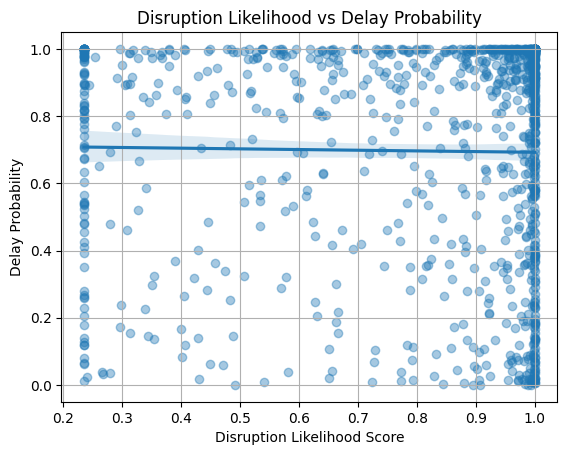

In [56]:
# --- Plot 15: Disruption Score vs Delay Probability ---
plt.figure()
sns.regplot(data=sampled_df, x='disruption_likelihood_score', y='delay_probability', scatter_kws={'alpha':0.4})
plt.title("Disruption Likelihood vs Delay Probability")
plt.xlabel("Disruption Likelihood Score")
plt.ylabel("Delay Probability")
plt.grid(True)
plt.show()